# Challenge: Data Cleaning & Validation #

### Cleaning of Journal Article Open-Access Prices Data ###

### By Lorenz Madarang ###

### Data: https://www.dropbox.com/s/pl5kcrhs2lyj90m/WELLCOME.zip?dl=0 ###

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
journal = pd.read_csv('Journal.csv', encoding = "ISO-8859-1")

In [3]:
journal.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [4]:
journal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
PMID/PMCID                                             1928 non-null object
Publisher                                              2127 non-null object
Journal title                                          2126 non-null object
Article title                                          2127 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    2127 non-null object
dtypes: object(5)
memory usage: 83.2+ KB


In [5]:
journal.rename(columns={'Journal title':'Journal_title'}, inplace=True)

In [6]:
journal.head()


,PMID/PMCID,Publisher,Journal_title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


#### Key Terms ####

 __PMID/PMCID__ : Unique Identifier number used in PubMed.  They are assigned to each article record when it     enters the PubMed System.
 
__Publisher__ : The publisher acronym of the journal

__Journal title__ : The medical journal title

__Article title__ : The title of the article in the medical journal accessed

__COST (£) charged to Wellcome (inc VAT when charged)__ : The open-access cost per article for each journal in British pounds (£)

In [7]:
count_journal = journal.Journal_title.value_counts()

In [8]:
count_journal


PLoS One                                                                                     92
PLoS ONE                                                                                     62
Journal of Biological Chemistry                                                              48
Nucleic Acids Research                                                                       21
Proceedings of the National Academy of Sciences                                              19
PLoS Neglected Tropical Diseases                                                             18
Human Molecular Genetics                                                                     18
Nature Communications                                                                        17
Neuroimage                                                                                   15
PLoS Pathogens                                                                               15
PLoS Genetics                           

### Data Cleaning Notes: Journal Title ###

There are different names for the same journal.  

For the number one journal, 'PLoS One':

1. 'PLoS ONE'
2. 'PLOS ONE'
3. 'PLoSONE'
4. 'PLoS 1'

For the number two journal, 'Journal of Biological Chemisty':

1. 'J Biol Chem.'
2. 'J Biol Chemistry'
3. 'JOURNAL OF BIOLOGICAL CHEMISTRY'
4. 'Jnl Biological Chemistry'
5. 'Journal Biological Chemistry'
6. 'Journal of Biological Chemistry'
7. 'Journal of Biol Chem'

For the number three journal, 'Nucleic Acids Research':

1. 'NUCLEIC ACIDS RESEARCH'
2. 'Nucleic Acid Research'
3. 'Nucleic Acids Research'
4. 'Nucleic Acids Research\n'
5. 'Nucleic Acids Research '

For the number four journal, 'Proceedings of the National Academy of the Sciences':

1. 'PNAS'
2. 'PNAS (Proceedings of the National Academy of Sciences of the United States of America'
3. 'PNAS USA'
4. 'Proc Natl Acad Sci U S A.'
5. 'Proceddings of the National Academy of Sciences of USA'
6. 'Proceedings of the National Academy of Sciences'
7. 'Proceedings of the National Academy of Sciences '
8. 'Proceedings of the National Academy of Sciences (PNAS)'
9. 'Proceedings of the National Academy of Sciences of the USA'
10. 'Proceedings of the National Academy of Sciences of the United States of America'
11. 'Proceedings of the National Academy of Sciences of the United States of America '
12. 'Proceedings of the national Academy of Sciences'
 
For the number five journal, 'PLoS Neglected Tropical Diseases':

1. 'PLOS Neglected Tropical Diseases'
2. 'PLoS Negected Tropical Diseases'
3. 'PLoS Neglected Tropical Diseases'

In [9]:
# Get Complete list of Journal Titles sorted by Alphabetical Order

journal_titles = count_journal.index.values.tolist()
sorted(journal_titles)

['ACS Chemical Biology',
 'ACS Chemical Neuroscience',
 'ACS NANO',
 'ACS Nano',
 'ACTA F',
 'AGE',
 'AIDS',
 'AIDS Behav',
 'AIDS Care',
 'AIDS Journal',
 'AIDS Research and Therapy',
 'AIDS UK',
 'ASN Neuro',
 'Academy of Nutrition and Dietetics',
 'Acta Crystallographica Section D,  Biological Crystallography ',
 'Acta Crystallographica Section D: Biological Crystallography',
 'Acta Crystallographica Section F: Structural Biology and Crystallization Communications',
 'Acta Crystallographica, Section D',
 'Acta Crystallography D',
 'Acta D',
 'Acta Dermato Venereologica',
 'Acta Diabetologica',
 'Acta Neuropathol',
 'Acta Neuropathologica',
 'Acta Opthalmologica',
 'Acta Physiol',
 'Addiction',
 'Advances in Experimental Medicine and Biology',
 'Age',
 'Age and Ageing',
 'Ageing & Society',
 'Aging Cell',
 'Aids Care',
 'Alcohol and Alcoholism',
 'Alimentrary Pharmacology & Therapeutics',
 'Am J Bioeth',
 'Am J Trop Med Hyg',
 'Americal Journal of Psychiatry',
 'American Chemical Soc

In [10]:
# Created Regular Expression to find all the Journal title variations of "PLoS One" Journal and then rename it "PLUS ONE"

for i in range(0,2126):
    if re.match('(PLo[Ss]ONE|(PLoS.1)|(PL[oO]S).O[Nn][eE])',str(journal.loc[i,'Journal_title'])):
        journal.loc[i, 'Journal_title'] = 'PLUS ONE'

In [11]:
# Verify Rename worked

count_journal = journal.Journal_title.value_counts()
count_journal

PLUS ONE                                                                                     194
Journal of Biological Chemistry                                                               48
Nucleic Acids Research                                                                        21
Proceedings of the National Academy of Sciences                                               19
Human Molecular Genetics                                                                      18
PLoS Neglected Tropical Diseases                                                              18
Nature Communications                                                                         17
PLoS Genetics                                                                                 15
Neuroimage                                                                                    15
PLoS Pathogens                                                                                15
NeuroImage                    

In [12]:
# Created Regular Expression to find all variations of the Journal title "Journal of Biological Chemistry" and rename it "JOURNAL OF BIOCHEMISTRY"

for i in range(0,2126):
    if re.match('.*(B[Ii][Oo][Ll])\w*.(C[Hh][Ee][Mm]).*',str(journal.loc[i, 'Journal_title'])):
        journal.loc[i, 'Journal_title'] = 'JOURNAL OF BIOLOGICAL CHEMISTRY'

In [13]:
# Verify that renaming worked 

count_journal = journal.Journal_title.value_counts()
print(count_journal)

PLUS ONE                                                                                     194
JOURNAL OF BIOLOGICAL CHEMISTRY                                                               71
Nucleic Acids Research                                                                        21
Proceedings of the National Academy of Sciences                                               19
PLoS Neglected Tropical Diseases                                                              18
Human Molecular Genetics                                                                      18
Nature Communications                                                                         17
PLoS Pathogens                                                                                15
Neuroimage                                                                                    15
PLoS Genetics                                                                                 15
Brain                         

In [14]:
# Created Regular Expression to find all variations of journal title "Nucleic Acids Research" and rename it "NUCLEIC ACIDS RESEARCH"

for i in range(0,2126):
    if re.match('(N[Uu][Cc][Ll][Ee][Ii][Cc]).(A[Cc][Ii][Dd]|[Ss]).*(R[Ee][Ss][Ee][Aa][Rr][Cc][Hh]).*',str(journal.loc[i, 'Journal_title'])):
        journal.loc[i, 'Journal_title'] = 'NUCLEIC ACIDS RESEARCH'

In [15]:
#Verify that renaming worked 

count_journal = journal.Journal_title.value_counts()
print(count_journal)

PLUS ONE                                                                                     194
JOURNAL OF BIOLOGICAL CHEMISTRY                                                               71
NUCLEIC ACIDS RESEARCH                                                                        29
Proceedings of the National Academy of Sciences                                               19
Human Molecular Genetics                                                                      18
PLoS Neglected Tropical Diseases                                                              18
Nature Communications                                                                         17
Neuroimage                                                                                    15
PLoS Genetics                                                                                 15
PLoS Pathogens                                                                                15
NeuroImage                    

In [16]:
# Created Regular Expression that finds all variations of the journal title "Proceedings of the National Academy of Sciences" 
# and rename it "PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES"

for i in range(0,2126):
    if re.match('(PNAS).*|(Proc).*(the [Nn]ational Academy of Sciences).*|(Proc).*(U\sS\sA.)',str(journal.loc[i, 'Journal_title'])):
        journal.loc[i, 'Journal_title'] = 'PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES'

In [17]:
# Verify that the renaming worked 

count_journal = journal.Journal_title.value_counts()
print(count_journal)

PLUS ONE                                                                                     194
JOURNAL OF BIOLOGICAL CHEMISTRY                                                               71
PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES                                               37
NUCLEIC ACIDS RESEARCH                                                                        29
PLoS Neglected Tropical Diseases                                                              18
Human Molecular Genetics                                                                      18
Nature Communications                                                                         17
PLoS Pathogens                                                                                15
Neuroimage                                                                                    15
PLoS Genetics                                                                                 15
NeuroImage                    

In [18]:
# Created Regular Expression to find all variations of the journal title "PLoS Neglected Tropical Diseases" and rename 
# it "PLOS NEGLECTED TROPICAL DISEASES"

for i in range(0,2126):
    if re.match('(P[Ll][Oo]S).(Neglected).*|(P[Ll][Oo]S).(Negected).*',str(journal.loc[i, 'Journal_title'])):
        journal.loc[i, 'Journal_title'] = 'PLOS NEGLECTED TROPICAL DISEASES'

In [19]:
# Verify that renaming worked 

count_journal = journal.Journal_title.value_counts()
print(count_journal)

PLUS ONE                                                                                     194
JOURNAL OF BIOLOGICAL CHEMISTRY                                                               71
PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES                                               37
NUCLEIC ACIDS RESEARCH                                                                        29
PLOS NEGLECTED TROPICAL DISEASES                                                              21
Human Molecular Genetics                                                                      18
Nature Communications                                                                         17
PLoS Genetics                                                                                 15
PLoS Pathogens                                                                                15
Neuroimage                                                                                    15
BMC Public Health             

In [20]:
# Created Regular Expression that finds all variations of the journal title "Human Molecular Genetics" and rename it
# "HUMAN MOLECULAR GENETICS

for i in range(0,2126):
    if re.match('(Human)\s*([Mm]ol).*',str(journal.loc[i, 'Journal_title'])):
        journal.loc[i, 'Journal_title'] = 'HUMAN MOLECULAR GENETICS'

In [21]:
# Verify that the renaming worked

count_journal = journal.Journal_title.value_counts()
print(count_journal)

PLUS ONE                                                                                     194
JOURNAL OF BIOLOGICAL CHEMISTRY                                                               71
PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES                                               37
NUCLEIC ACIDS RESEARCH                                                                        29
PLOS NEGLECTED TROPICAL DISEASES                                                              21
HUMAN MOLECULAR GENETICS                                                                      21
Nature Communications                                                                         17
PLoS Genetics                                                                                 15
Neuroimage                                                                                    15
PLoS Pathogens                                                                                15
BMC Public Health             

In [22]:
# Created a Regular Expression that finds all the variations of the journal title 'Nature Communications" and rename
# it "NATURE COMMUNICATIONS"

for i in range(0,2126):
    if re.match('(N[Aa][Tt][Uu][Rr][Ee]).([Cc]ommunications)|(N[Aa][Tt][Uu][Rr][Ee]).([Cc]OMMUNICATIONS)',str(journal.loc[i, 'Journal_title'])):
        journal.loc[i, 'Journal_title'] = 'NATURE COMMUNICATIONS'

In [23]:
# Verify that the renaming worked 

count_journal = journal.Journal_title.value_counts()
print(count_journal)

PLUS ONE                                                                                     194
JOURNAL OF BIOLOGICAL CHEMISTRY                                                               71
PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES                                               37
NUCLEIC ACIDS RESEARCH                                                                        29
HUMAN MOLECULAR GENETICS                                                                      21
PLOS NEGLECTED TROPICAL DISEASES                                                              21
NATURE COMMUNICATIONS                                                                         19
Neuroimage                                                                                    15
PLoS Genetics                                                                                 15
PLoS Pathogens                                                                                15
BMC Public Health             

In [24]:
# Created Regular Expression to find all the variations of the journal title "PLoS Pathogens" and rename it 
# "PLOS PATHOGENS"

for i in range(0,2126):
    if re.match('(P[Ll][Oo][Ss]).(Pathogens)',str(journal.loc[i, 'Journal_title'])):
        journal.loc[i, 'Journal_title'] = 'PLOS PATHOGENS'

In [25]:
# Verify that the renaming worked

count_journal = journal.Journal_title.value_counts()
print(count_journal)

PLUS ONE                                                                                     194
JOURNAL OF BIOLOGICAL CHEMISTRY                                                               71
PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES                                               37
NUCLEIC ACIDS RESEARCH                                                                        29
PLOS PATHOGENS                                                                                24
HUMAN MOLECULAR GENETICS                                                                      21
PLOS NEGLECTED TROPICAL DISEASES                                                              21
NATURE COMMUNICATIONS                                                                         19
PLoS Genetics                                                                                 15
Neuroimage                                                                                    15
NeuroImage                    

In [26]:
# Create Regular Expression that finds all the variations of the journal title "PLoS Genetics" and rename it
# "PLOS GENETICS"

for i in range(0,2126):
    if re.match('(P[Ll][Oo][Ss]).(Genetics)|(P[Ll][Oo][Ss]).(GENETICS)',str(journal.loc[i, 'Journal_title'])):
        journal.loc[i, 'Journal_title'] = 'PLOS GENETICS'

In [27]:
count_journal = journal.Journal_title.value_counts()
print(count_journal)

PLUS ONE                                                                                     194
JOURNAL OF BIOLOGICAL CHEMISTRY                                                               71
PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES                                               37
NUCLEIC ACIDS RESEARCH                                                                        29
PLOS GENETICS                                                                                 24
PLOS PATHOGENS                                                                                24
HUMAN MOLECULAR GENETICS                                                                      21
PLOS NEGLECTED TROPICAL DISEASES                                                              21
NATURE COMMUNICATIONS                                                                         19
Neuroimage                                                                                    15
Brain                         

In [28]:
# Create a Regular Expression that finds all the variations of the journal title "Neuroimage" and renames it 
# "NEUROIMAGE"

for i in range(0,2126):
    if re.match('(Neuro).(mage)',str(journal.loc[i, 'Journal_title'])):
        journal.loc[i, 'Journal_title'] = 'NEUROIMAGE'

In [29]:
# Verify that renaming worked 

count_journal = journal.Journal_title.value_counts()
print(count_journal)

PLUS ONE                                                                                     194
JOURNAL OF BIOLOGICAL CHEMISTRY                                                               71
PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES                                               37
NEUROIMAGE                                                                                    36
NUCLEIC ACIDS RESEARCH                                                                        29
PLOS GENETICS                                                                                 24
PLOS PATHOGENS                                                                                24
PLOS NEGLECTED TROPICAL DISEASES                                                              21
HUMAN MOLECULAR GENETICS                                                                      21
NATURE COMMUNICATIONS                                                                         19
BMC Public Health             

### Data Cleaning Notes: Cost ###

1.) In the column "COST (£) charged to Wellcome (inc VAT when charged)" the data type for the values is a string. I duplicated the column and renamed it "Cost"  and indexed the value to remove the (£) symbol and converted the value to a float.

2.) In the 'Cost' column there are values where the cost is 999999.  This is anomalous value, so I just assigned it the cost 900.00

3.) In the plus_one dataset even after removing the 999999 values.  There was a cost of 192645.  This cost is anomalous so I removed it.

4.) In the plos_pathogens dataset some of the values are in the format '1600.25($)' .  It has an American dollar sign, so I assume that the unit is still the (£).  I created an algorithm to index those values.   


In [30]:
# Create dataset with only the journals with the title 'PLUS ONE'

plus_one = journal[journal['Journal_title'] == 'PLUS ONE']


In [31]:
# Find length of the dataset 

print(len(plus_one))

194


In [32]:
# Take a look at the dataset 

plus_one


,PMID/PMCID,Publisher,Journal_title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
1282,3517619,PLoS,PLUS ONE,HCN1 and HCN2 in Rat DRG Neurons: Levels in No...,£1001.03
1284,3515553,PLoS,PLUS ONE,Vitamin B-12 status during pregnancy and child...,£1011.45
1285,3522679,PLoS,PLUS ONE,Validation of Dual Energy X-ray Absorptiometry...,£1011.45
1286,3485223,PLoS,PLUS ONE,Associations of different phenotypes of wheezi...,£1015.73
1287,PMC3547059,PLoS,PLUS ONE,"""Involvement of EphB1 receptors signalling in ...",£1023.41
1288,3573029,PLoS,PLUS ONE,Reactive oxygen species modulate the barrier f...,£1039.87
1289,3769269,PLoS,PLUS ONE,Chronic pravastatin but not atorvastatin treat...,£1061.24
1290,3782430,PLoS,PLUS ONE,Expression of HIV-1 Vpu Leads to Loss of the V...,£1061.24
1291,3797097,PLoS,PLUS ONE,Molecular phylogeny of a RING E3 ubiquitin lig...,£1061.24
1292,3675909,PLoS,PLUS ONE,Anti-Müllerian hormone is not associated with ...,£1080.00


In [33]:
# Duplicate the 'COST (£) charged to Wellcome (inc VAT when charged)' column and rename it 'Cost'

plus_one['Cost'] = plus_one['COST (£) charged to Wellcome (inc VAT when charged)']


/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
plus_one

,PMID/PMCID,Publisher,Journal_title,Article title,COST (£) charged to Wellcome (inc VAT when charged),Cost
1282,3517619,PLoS,PLUS ONE,HCN1 and HCN2 in Rat DRG Neurons: Levels in No...,£1001.03,£1001.03
1284,3515553,PLoS,PLUS ONE,Vitamin B-12 status during pregnancy and child...,£1011.45,£1011.45
1285,3522679,PLoS,PLUS ONE,Validation of Dual Energy X-ray Absorptiometry...,£1011.45,£1011.45
1286,3485223,PLoS,PLUS ONE,Associations of different phenotypes of wheezi...,£1015.73,£1015.73
1287,PMC3547059,PLoS,PLUS ONE,"""Involvement of EphB1 receptors signalling in ...",£1023.41,£1023.41
1288,3573029,PLoS,PLUS ONE,Reactive oxygen species modulate the barrier f...,£1039.87,£1039.87
1289,3769269,PLoS,PLUS ONE,Chronic pravastatin but not atorvastatin treat...,£1061.24,£1061.24
1290,3782430,PLoS,PLUS ONE,Expression of HIV-1 Vpu Leads to Loss of the V...,£1061.24,£1061.24
1291,3797097,PLoS,PLUS ONE,Molecular phylogeny of a RING E3 ubiquitin lig...,£1061.24,£1061.24
1292,3675909,PLoS,PLUS ONE,Anti-Müllerian hormone is not associated with ...,£1080.00,£1080.00


In [35]:
# Index out the (£) symbol and convert the data types to float

for i in range(0,194):
    x = plus_one['Cost'].iloc[i]
    plus_one['Cost'].iloc[i] = float(x[1:])

/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
plus_one

,PMID/PMCID,Publisher,Journal_title,Article title,COST (£) charged to Wellcome (inc VAT when charged),Cost
1282,3517619,PLoS,PLUS ONE,HCN1 and HCN2 in Rat DRG Neurons: Levels in No...,£1001.03,1001.03
1284,3515553,PLoS,PLUS ONE,Vitamin B-12 status during pregnancy and child...,£1011.45,1011.45
1285,3522679,PLoS,PLUS ONE,Validation of Dual Energy X-ray Absorptiometry...,£1011.45,1011.45
1286,3485223,PLoS,PLUS ONE,Associations of different phenotypes of wheezi...,£1015.73,1015.73
1287,PMC3547059,PLoS,PLUS ONE,"""Involvement of EphB1 receptors signalling in ...",£1023.41,1023.41
1288,3573029,PLoS,PLUS ONE,Reactive oxygen species modulate the barrier f...,£1039.87,1039.87
1289,3769269,PLoS,PLUS ONE,Chronic pravastatin but not atorvastatin treat...,£1061.24,1061.24
1290,3782430,PLoS,PLUS ONE,Expression of HIV-1 Vpu Leads to Loss of the V...,£1061.24,1061.24
1291,3797097,PLoS,PLUS ONE,Molecular phylogeny of a RING E3 ubiquitin lig...,£1061.24,1061.24
1292,3675909,PLoS,PLUS ONE,Anti-Müllerian hormone is not associated with ...,£1080.00,1080


In [37]:
# Find where the max 'Cost' values are located and what they look like

plus_one[plus_one['Cost'] == plus_one['Cost'].max()]


,PMID/PMCID,Publisher,Journal_title,Article title,COST (£) charged to Wellcome (inc VAT when charged),Cost
1560,3726600,Public Library of Science,PLUS ONE,Plasmodium falciparum vary Gene Expression Hom...,£999999.00,999999
1561,23285297,Public Library of Science,PLUS ONE,Pharmacological inhibition of caspase-2 protec...,£999999.00,999999
1562,PMC3720940,Public Library of Science,PLUS ONE,Population-based CD4 counts in a rural area in...,£999999.00,999999
1563,PMCID: PMC3748079,Public Library of Science,PLUS ONE,Plant SILAC: stable-isotope labelling with ami...,£999999.00,999999
1564,PMCID:\n PMC3579793,Public Library of Science,PLUS ONE,Phagocytosis Is the Main CR3-Mediated Function...,£999999.00,999999
1565,PMCID:\n PMC3732248,Public Library of Science,PLUS ONE,Pneumocystis jirovecii pneumonia in tropical a...,£999999.00,999999
1566,PMCID:\n PMC3767740\n,Public Library of Science,PLUS ONE,Phenotypic alteration of neutrophils in the bl...,£999999.00,999999
1612,PMC3777952\n,Public Library of Science,PLUS ONE,Retinal Nerve Fibre Layer Thickness and Contra...,£999999.00,999999


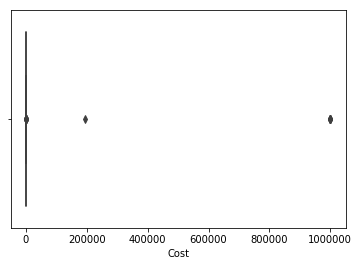

In [38]:
# Boxplot of the Cost values 

x = plus_one['Cost']
sns.boxplot(x)

In [39]:
# Remove the values 999999 and replace with 900

for i in range(0,194):
    if plus_one['Cost'].iloc[i] == 999999:
        plus_one['Cost'].iloc[i] = 900.00

/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


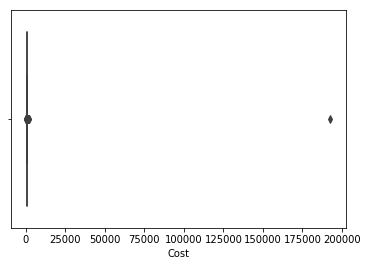

In [40]:
# Boxplot to see how distribution looks like after removing the anomalous values

sns.boxplot(x)

In [41]:
# See where the max cost is located 

plus_one[plus_one['Cost'] == plus_one['Cost'].max()]

,PMID/PMCID,Publisher,Journal_title,Article title,COST (£) charged to Wellcome (inc VAT when charged),Cost
1470,3547931,Public Library of Science,PLUS ONE,Reducing stock-outs of life saving Malaria Com...,£192645.00,192645


In [42]:
# Remove the outlier and replace it with the value 'None'

for i in range(0,194):
    if plus_one['Cost'].iloc[i] == plus_one['Cost'].max():
        plus_one['Cost'].iloc[i] = None

/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
plus_one

,PMID/PMCID,Publisher,Journal_title,Article title,COST (£) charged to Wellcome (inc VAT when charged),Cost
1282,3517619,PLoS,PLUS ONE,HCN1 and HCN2 in Rat DRG Neurons: Levels in No...,£1001.03,1001.03
1284,3515553,PLoS,PLUS ONE,Vitamin B-12 status during pregnancy and child...,£1011.45,1011.45
1285,3522679,PLoS,PLUS ONE,Validation of Dual Energy X-ray Absorptiometry...,£1011.45,1011.45
1286,3485223,PLoS,PLUS ONE,Associations of different phenotypes of wheezi...,£1015.73,1015.73
1287,PMC3547059,PLoS,PLUS ONE,"""Involvement of EphB1 receptors signalling in ...",£1023.41,1023.41
1288,3573029,PLoS,PLUS ONE,Reactive oxygen species modulate the barrier f...,£1039.87,1039.87
1289,3769269,PLoS,PLUS ONE,Chronic pravastatin but not atorvastatin treat...,£1061.24,1061.24
1290,3782430,PLoS,PLUS ONE,Expression of HIV-1 Vpu Leads to Loss of the V...,£1061.24,1061.24
1291,3797097,PLoS,PLUS ONE,Molecular phylogeny of a RING E3 ubiquitin lig...,£1061.24,1061.24
1292,3675909,PLoS,PLUS ONE,Anti-Müllerian hormone is not associated with ...,£1080.00,1080


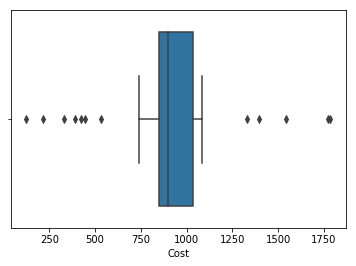

In [44]:
# Boxplot to see the distribution of the costs, the distribution looks good so I will proceed with the 
# summary statistics of the cost for the journal 

x = plus_one['Cost']
sns.boxplot(x=plus_one['Cost'])

#### Mean Cost ####

In [45]:
print(plus_one['Cost'].mean())


924.31015544


#### Median Cost ####

In [51]:
print(plus_one['Cost'].median())

897.19


#### Cost Standard Deviation ####

In [52]:
print(plus_one['Cost'].std())

179.153827354


In [ ]:

def convert_cost(dataframe):
    """ Duplicates the 'COST (£) charged to Wellcome (inc VAT when charged)' and renames it 'Cost' then indexes out 
    the (£) symbol and converts the values to floats """
    
    dataframe['Cost'] = dataframe['COST (£) charged to Wellcome (inc VAT when charged)']
    
    for i in range(0,len(dataframe)):
        x = dataframe['Cost'].iloc[i]
        dataframe['Cost'].iloc[i] = float(x[1:])

In [ ]:
def remove_999(dataframe):
    """ Removes the values that equal 999999 and replaces it with the value 900.00"""
    
    for i in range(0,len(dataframe)):
        if dataframe['Cost'].iloc[i] == 999999:
            dataframe['Cost'].iloc[i] = 900.00

In [ ]:
def sum_stats(dataframe):
    """ Summary statistics for the 'Cost' column: mean, median, and standard deviation"""
    
    print("The mean is " + str(dataframe['Cost'].mean()))
    print("The median is " + str(dataframe['Cost'].median()))
    print("The standard dev is " + str(dataframe['Cost'].std()))

In [54]:
journ_biochem = journal[journal['Journal_title'] == 'JOURNAL OF BIOLOGICAL CHEMISTRY']

In [55]:
journ_biochem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 16 to 1835
Data columns (total 5 columns):
PMID/PMCID                                             70 non-null object
Publisher                                              71 non-null object
Journal_title                                          71 non-null object
Article title                                          71 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    71 non-null object
dtypes: object(5)
memory usage: 3.3+ KB


In [56]:
journ_biochem.head(n=25)

,PMID/PMCID,Publisher,Journal_title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
16,22610094,AMBSB,JOURNAL OF BIOLOGICAL CHEMISTRY,Annexin-1 interaction with FPR2/ALX,£265.67
60,PMC3576085,American Soc for Biochemistry and Molecular Bi...,JOURNAL OF BIOLOGICAL CHEMISTRY,Understanding how noncatalytic carbohydrate bi...,£1100.00
61,23239883 PMC3561570,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Molecular architecture and functional analysis...,£2259.64
62,PMC3481300,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Structure of the BMP receptor ALK2 and implica...,£1487.46
63,PMC3234852,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Inhibitory member of the apoptosis-stimulating...,£1531.08
64,PMCID: PMC3642348,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Human and viral golgi anti-apoptotic protein (...,£1019.71
65,PMID: 22992744 PMC3493908,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Dynamic exchange of myosin VI on endocytic str...,£1119.61
66,PMCID: PMC3531748,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Uncoupling proteostasis and development in vit...,£1131.01
67,PMCID: PMC3436574\n,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Structural Requirements for Recognition of Maj...,£1137.51
68,PMID: 23223336 PMC3543027,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Visualization of structural changes accompanyi...,£1152.72


In [57]:
convert_cost(journ_biochem)

/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
journ_biochem.head()

,PMID/PMCID,Publisher,Journal_title,Article title,COST (£) charged to Wellcome (inc VAT when charged),Cost
16,22610094,AMBSB,JOURNAL OF BIOLOGICAL CHEMISTRY,Annexin-1 interaction with FPR2/ALX,£265.67,265.67
60,PMC3576085,American Soc for Biochemistry and Molecular Bi...,JOURNAL OF BIOLOGICAL CHEMISTRY,Understanding how noncatalytic carbohydrate bi...,£1100.00,1100
61,23239883 PMC3561570,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Molecular architecture and functional analysis...,£2259.64,2259.64
62,PMC3481300,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Structure of the BMP receptor ALK2 and implica...,£1487.46,1487.46
63,PMC3234852,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Inhibitory member of the apoptosis-stimulating...,£1531.08,1531.08


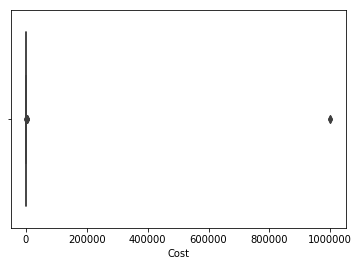

In [59]:
x = journ_biochem['Cost']
sns.boxplot(x)

In [60]:
journ_biochem['Cost'].max()

999999.0

In [61]:
journ_biochem[journ_biochem['Cost'] == journ_biochem['Cost'].max()]

,PMID/PMCID,Publisher,Journal_title,Article title,COST (£) charged to Wellcome (inc VAT when charged),Cost
149,PMC3234811,ASBMB,JOURNAL OF BIOLOGICAL CHEMISTRY,Picomolar nitric oxide signals from central ne...,£999999.00,999999
1835,PMCID:PMC3268392,The American Society for Biochemistry and Mole...,JOURNAL OF BIOLOGICAL CHEMISTRY,Photoaffinity labelling of high affinity nicot...,£999999.00,999999


In [62]:
remove_999(journ_biochem)

/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [63]:
journ_biochem['Cost'].max()


2501.07

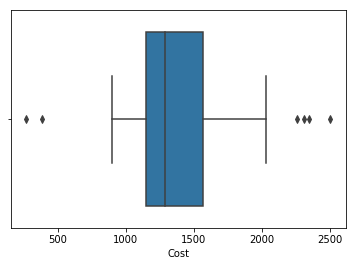

In [63]:
x = journ_biochem['Cost']
sns.boxplot(x)

In [64]:
sum_stats(journ_biochem)

The mean is 1370.06577465
The median is 1290.23
The standard dev is 393.065104708


In [65]:
pcna = journal[journal['Journal_title'] == 'PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES']

In [66]:
pcna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 429 to 1340
Data columns (total 5 columns):
PMID/PMCID                                             37 non-null object
Publisher                                              37 non-null object
Journal_title                                          37 non-null object
Article title                                          37 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    37 non-null object
dtypes: object(5)
memory usage: 1.7+ KB


In [67]:
pcna.head(n=15)

,PMID/PMCID,Publisher,Journal_title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
429,2766312,Dartmouth Journal Services,PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES,Analysis of Synthetic Lethality Reveals Geneti...,£1241.10
430,PMC3511132,Dartmouth Journal Services,PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES,SGTA antagonizes BAG6-mediated protein triage,£603.42
431,3704016,Dartmouth Journal Services,PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES,Inositol kinase and its product accelerate wou...,£660.59
436,3549118,Dartmouth Journals,PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES,CTLA-4 controls the thymic development of both...,£625.00
1002,PMCID: PMC3606975,National Academy of Sciences,PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES,Membrane lipid saturation activates endoplasmi...,£667.74
1003,PMCID: PMC3780889,National Academy of Sciences,PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES,Activation of the canonical IKK complex by K63...,£853.64
1004,PMCID: PMC3465389,National Academy of Sciences,PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES,Evidence that Viral RNAs have Evolved for Effi...,£619.83
1005,PMCID:\n PMC3670340\n,National Academy of Sciences,PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES,Systematic identification of conserved bacteri...,£395.60
1006,PMCID:\n PMC3479458\n,National Academy of Sciences,PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES,Structural basis for the recognition and cleav...,£605.17
1007,PMCID:\n PMC3529010,National Academy of Sciences,PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES,Interactions between the nucleosome histone co...,£614.95


In [68]:
convert_cost(pcna)

/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


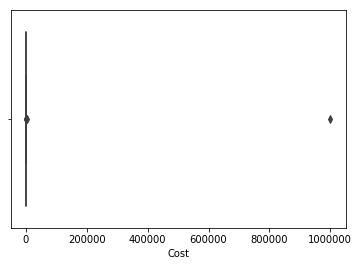

In [69]:
x = pcna['Cost']
sns.boxplot(x)

In [70]:
remove_999(pcna)

/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [71]:
pcna['Cost'].max()

2691.68

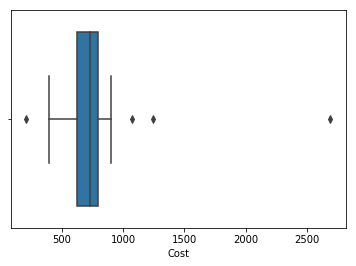

In [72]:
x = pcna['Cost']
sns.boxplot(x)

In [73]:
sum_stats(pcna)

The mean is 776.353783784
The median is 732.25
The standard dev is 365.611565047


In [74]:
neuroimage = journal[journal['Journal_title'] == 'NEUROIMAGE']

In [75]:
neuroimage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 437 to 722
Data columns (total 5 columns):
PMID/PMCID                                             30 non-null object
Publisher                                              36 non-null object
Journal_title                                          36 non-null object
Article title                                          36 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    36 non-null object
dtypes: object(5)
memory usage: 1.7+ KB


In [76]:
neuroimage.head(n=15)

,PMID/PMCID,Publisher,Journal_title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
437,23672768,Elseveier Science,NEUROIMAGE,Gearing up for action: attentive tracking dyna...,£1758.89
438,23046981,Elseveier Science,NEUROIMAGE,Good practice for conducting and reporting MEG...,£2345.00
689,PMC3734349\n,Elsevier,NEUROIMAGE,Connectivity-based neurofeedback: dynamic caus...,£1747.16
690,PMC3734350\n,Elsevier,NEUROIMAGE,The impact of distractor congruency on stimulu...,£1760.94
691,PMC3734351\n,Elsevier,NEUROIMAGE,Distinct encoding of risk and value in economi...,£1762.69
692,PMC3734352\n,Elsevier,NEUROIMAGE,Parcellation of the human substantia nigra bas...,£1762.69
693,NaN,Elsevier,NEUROIMAGE,Characterising reward outcome signals in senso...,£1779.76
694,PMC3677092,Elsevier,NEUROIMAGE,Neural correlates of working memory in Tempora...,£1961.25
695,PMCID: PMC3021391,Elsevier,NEUROIMAGE,Dynamic causal modelling of effective connecti...,£2100.54
696,PMCID: PMC2877799,Elsevier,NEUROIMAGE,Action selection: a race model for selected an...,£2118.57


In [77]:
convert_cost(neuroimage)

/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


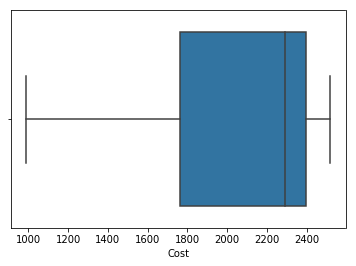

In [78]:
x = neuroimage['Cost']
sns.boxplot(x)

In [79]:
sum_stats(neuroimage)

The mean is 2057.31805556
The median is 2289.245
The standard dev is 466.871610414


In [80]:
plos_genetics = journal[journal['Journal_title'] == 'PLOS GENETICS']

In [81]:
convert_cost(plos_genetics)

/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


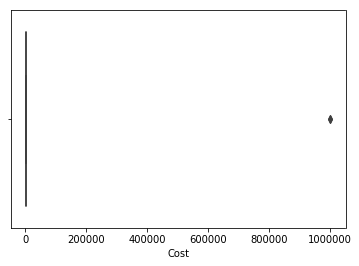

In [82]:
x = plos_genetics['Cost']
sns.boxplot(x)

In [83]:
remove_999(plos_genetics)

/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


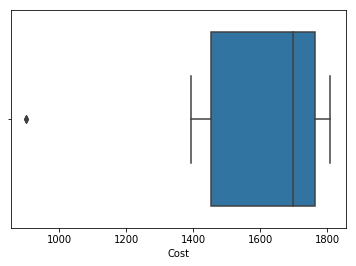

In [84]:
x = plos_genetics['Cost']
sns.boxplot(x)

In [85]:
sum_stats(plos_genetics)

The mean is 1581.185
The median is 1696.67
The standard dev is 255.916176375


In [86]:
plos_pathogens = journal[journal['Journal_title'] == 'PLOS PATHOGENS']

In [87]:
plos_pathogens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1300 to 1604
Data columns (total 5 columns):
PMID/PMCID                                             24 non-null object
Publisher                                              24 non-null object
Journal_title                                          24 non-null object
Article title                                          24 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    24 non-null object
dtypes: object(5)
memory usage: 1.1+ KB


In [88]:
plos_pathogens

,PMID/PMCID,Publisher,Journal_title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
1300,PMC3597521,PLOS,PLOS PATHOGENS,Th2 Cell-intrinsic Hypo-responsiveness determi...,£1343.73
1301,PMC3798605,PLOS,PLOS PATHOGENS,Independent pathways can transduce the life-cy...,£1438.45
1583,PMCID:\n PMC3486875\n,Public Library of Science,PLOS PATHOGENS,Histone H1 plays a role in heterochromatin for...,£1254.02
1584,23326235,Public Library of Science,PLOS PATHOGENS,"Schmallenberg virus pathogenesis, tropism and ...",£1397.00
1585,21483485,Public Library of Science,PLOS PATHOGENS,Lung adenocarcinoma originates from retrovirus...,£1404.00
1586,22241985,Public Library of Science,PLOS PATHOGENS,Identification and characterization of a novel...,£1440.00
1587,PMCID:\n PMC3578823,Public Library of Science,PLOS PATHOGENS,Induction of p16(INK4a) Is the Major Barrier t...,£1600.79
1588,PMCID:\n PMC3764221,Public Library of Science,PLOS PATHOGENS,The zebrafish as a new model for the in vivo s...,£1602.17
1589,PMCID:\n PMC3192839,Public Library of Science,PLOS PATHOGENS,KIR2DL2 enhances protective and detrimental HL...,£1644.84
1590,PMID: 23468629 /PMCID: PMC3585132,Public Library of Science,PLOS PATHOGENS,"The plasmodium berghei Ca2+/H+Exchanger, PbCAX...",£1723.16


In [89]:
convert_cost(plos_pathogens)

/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


ValueError: could not convert string to float: '440$'

In [90]:
plos_pathogens['Cost'] = plos_pathogens['COST (£) charged to Wellcome (inc VAT when charged)']
    
for i in range(0,len(plos_pathogens)):
    try:
        x = plos_pathogens['Cost'].iloc[i]
        plos_pathogens['Cost'].iloc[i] = float(x[1:])
    except ValueError:
        x = plos_pathogens['Cost'].iloc[i]
        plos_pathogens['Cost'].iloc[i] = float(x[:-1])

/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versu

In [91]:
remove_999(plos_pathogens)

/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


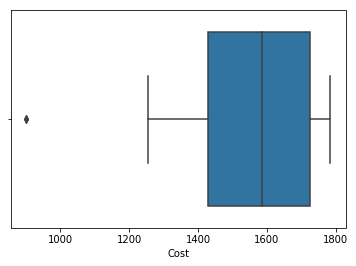

In [92]:
x = plos_pathogens['Cost']
sns.boxplot(x)

In [93]:
sum_stats(plos_pathogens)

The mean is 1516.79458333
The median is 1585.56
The standard dev is 244.920164969
